In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

[[(710, 66), (710, 66)], [(516, 94), (567, 212)], [(553, 212), (531, 119)], [(545, 256), (276, 399)]]


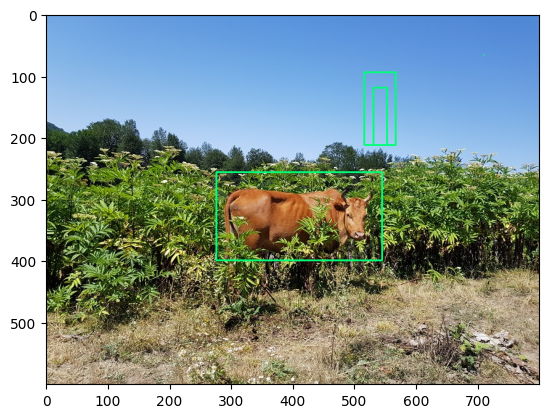

In [6]:
start_point = (0,0)
points = []
drawing = False

def annotate_image(event, x, y, flags, param):
    global start_point, points, drawing
    
    if event == cv.EVENT_LBUTTONDOWN:
        start_point = (x, y)
        drawing = True
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing:
            temp_image = image.copy()
            cv.rectangle(temp_image, start_point, (x, y), (120, 255, 0), 2)
            cv.imshow("image", temp_image)
    elif event == cv.EVENT_LBUTTONUP:
        points.append([start_point, (x,y)])
        cv.rectangle(image, start_point, (x, y), (120, 255, 0), 2)
        cv.imshow("image", image)
        drawing = False
        
        
image = cv.imread("D:\Opencv\class.vision-master\images\input.jpg")
clone = image.copy()
temp_image = image.copy()
cv.namedWindow("image")
cv.setMouseCallback("image", annotate_image)

while True:
    if drawing == False:
        cv.imshow("image", image)
    key = cv.waitKey(5) & 0xFF
    
    if key == ord("r"):
        image = clone.copy()
        points = []
    elif key == 27:
        break
        
cv.destroyAllWindows()
plt.imshow(image[...,::-1])
print(points)

[[(562, 271), (266, 437)], [(520, 41), (215, 196)]]


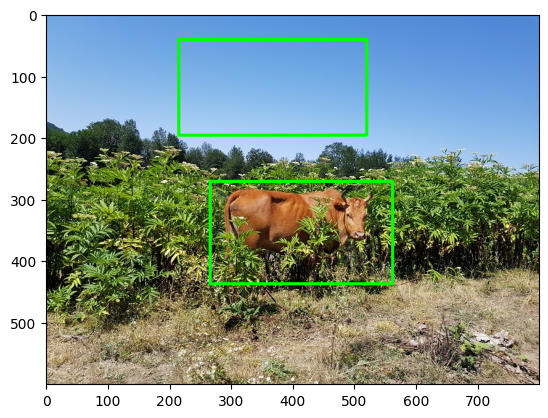

In [8]:
start_point = (0,0)
points = []
drawing = False

def annotate_image_with_undo(event, x, y, flags, param):
    global start_point, points, drawing
    
    if event == cv.EVENT_LBUTTONDOWN:
        start_point = (x, y)
        drawing = True
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing:
            temp_image = image.copy()
            cv.rectangle(temp_image, start_point, (x, y), (120, 255, 0), 2)
            cv.imshow("image", temp_image)
    elif event == cv.EVENT_LBUTTONUP:
        points.append([start_point, (x,y)])
        cv.rectangle(image, start_point, (x, y), (120, 255, 0), 2)
        cv.imshow("image", image)
        drawing = False
        
        
image = cv.imread("D:\Opencv\class.vision-master\images\input.jpg")
clone = image.copy()
temp_image = image.copy()
cv.namedWindow("image")
cv.setMouseCallback("image", annotate_image_with_undo)

while True:
    if drawing == False:
        cv.imshow("image", image)
    key = cv.waitKey(5) & 0xFF
    
    if key == ord("r"):
        image = clone.copy()
        points = []
    elif key == ord('z'):
        image = clone.copy()
        points.pop()
        for p in points:
            cv.rectangle(image,p[0], p[1], (0,255,0), 3)
    elif key == 27:
        break
        
cv.destroyAllWindows()
plt.imshow(image[...,::-1])
print(points)